In [1]:
from study_help import load_studies
from study_visualize import *
from study import Study

from pathlib import Path

In [2]:
studies = load_studies(Path.cwd().parent / 'study_data')

In [3]:
for s in studies:
    count_answers(s)
    count_answers(s, "(wing|mantle|feather)+")

Study 251570_ours has 8 matches for query \S.
Study 251570_ours has 8 matches for query (wing|mantle|feather)+.
Study 251570_vandenhende has 6 matches for query \S.
Study 251570_vandenhende has 6 matches for query (wing|mantle|feather)+.
Study 433137_ours has 6 matches for query \S.
Study 433137_ours has 4 matches for query (wing|mantle|feather)+.
Study 433137_vandenhende has 5 matches for query \S.
Study 433137_vandenhende has 0 matches for query (wing|mantle|feather)+.


Study 251570_ours received 9 responses.
Study 251570_vandenhende received 7 responses.
Study 433137_ours received 6 responses.
Study 433137_vandenhende received 6 responses.
Total responses received: 28
{'University E-mail': array([9., 6., 1., 0., 0.]), 'Biology E-mail': array([0., 0., 0., 0., 0.]), 'Bird Forums': array([0., 2., 1., 4., 2.]), 'Other': array([1., 1., 1., 0., 0.])}


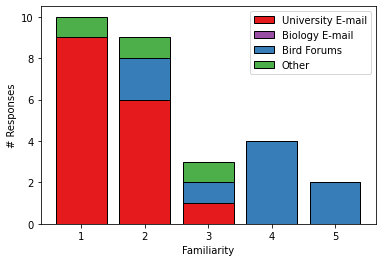

In [4]:
visualize_familiarity_count(studies)

In [12]:
for s in studies:
    print(f"Average familiarity for study {s.name}: {np.average([r.familiarity for r in s.responses])}")
    print(f"Fraction of certain answers for {s.name}: {np.count_nonzero([[abs(a) == 1 for a in r.main_testing] for r in s.responses]) / np.count_nonzero([[a for a in r.main_testing] for r in s.responses])}")

Average familiarity for study 251570_ours: 2.4444444444444446
Fraction of certain answers for 251570_ours: 0.5888888888888889
Average familiarity for study 251570_vandenhende: 2.7142857142857144
Fraction of certain answers for 251570_vandenhende: 0.8571428571428571
Average familiarity for study 433137_ours: 1.6666666666666667
Fraction of certain answers for 433137_ours: 0.35
Average familiarity for study 433137_vandenhende: 2.0
Fraction of certain answers for 433137_vandenhende: 0.2833333333333333


In [6]:
for s in studies:
    s.evaluate()

Response 0 of study 251570_ours has an accuracy of 0.1
Response 1 of study 251570_ours has an accuracy of 0.9
Response 2 of study 251570_ours has an accuracy of 0.6
Response 3 of study 251570_ours has an accuracy of 1.0
Response 4 of study 251570_ours has an accuracy of 0.1
Response 5 of study 251570_ours has an accuracy of 1.0
Response 6 of study 251570_ours has an accuracy of 0.3
Response 7 of study 251570_ours has an accuracy of 0.9
Response 8 of study 251570_ours has an accuracy of 0.9
Average accuracy for study 251570_ours is 0.6444444444444445
Response 0 of study 251570_vandenhende has an accuracy of 1.0
Response 1 of study 251570_vandenhende has an accuracy of 1.0
Response 2 of study 251570_vandenhende has an accuracy of 1.0
Response 3 of study 251570_vandenhende has an accuracy of 1.0
Response 4 of study 251570_vandenhende has an accuracy of 0.9
Response 5 of study 251570_vandenhende has an accuracy of 0.9
Response 6 of study 251570_vandenhende has an accuracy of 0.9
Average ac

In [7]:
for s in studies:    
    s.create_valid_responses().evaluate()

Response 0 of study 251570_ours (Valid Intro) has an accuracy of 0.6
Response 1 of study 251570_ours (Valid Intro) has an accuracy of 1.0
Response 2 of study 251570_ours (Valid Intro) has an accuracy of 0.1
Response 3 of study 251570_ours (Valid Intro) has an accuracy of 1.0
Response 4 of study 251570_ours (Valid Intro) has an accuracy of 0.3
Response 5 of study 251570_ours (Valid Intro) has an accuracy of 0.9
Response 6 of study 251570_ours (Valid Intro) has an accuracy of 0.9
Average accuracy for study 251570_ours (Valid Intro) is 0.6857142857142857
Response 0 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 1 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 2 of study 251570_vandenhende (Valid Intro) has an accuracy of 1.0
Response 3 of study 251570_vandenhende (Valid Intro) has an accuracy of 0.9
Response 4 of study 251570_vandenhende (Valid Intro) has an accuracy of 0.9
Average accuracy for study 251570_vandenhende (Valid Intro) is

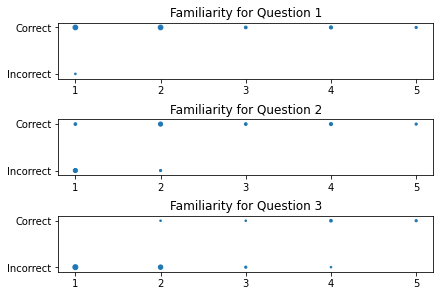

In [8]:
visualize_familiarity_correlation(studies)

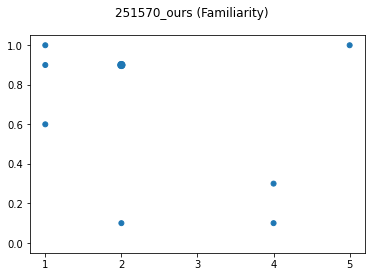

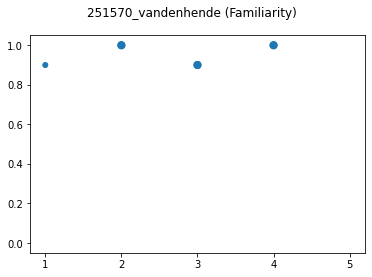

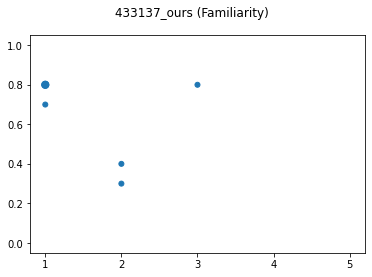

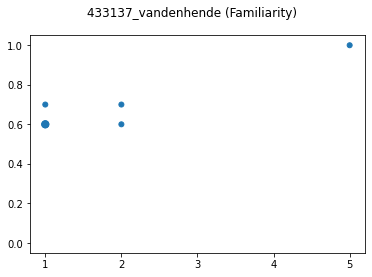

In [9]:
for s in studies:
    visualize_familiarity(s)

Number of valid responses: 7 out of 9
251570_ours (Accuracy)


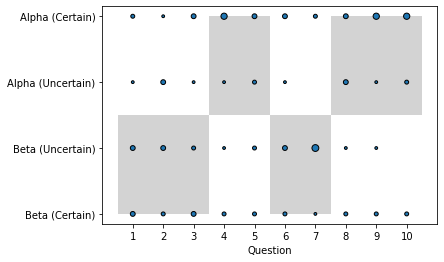

251570_ours (Valid Intro) (Accuracy)


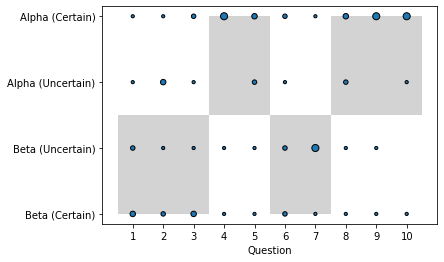

251570_ours_0 (Valid) (Accuracy)


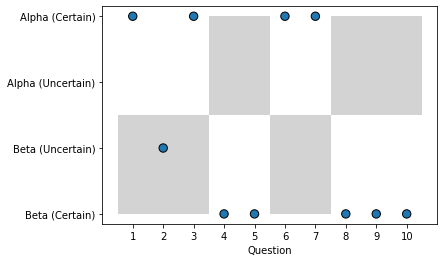

0: dark wings
1: unclear if wings are dark or not
2: 
3: 
4: 
5: 
6: 
7: 
8: 
9: 
color of wings is the easiest feature for distinguishing them
251570_ours_1 (Valid) (Accuracy)


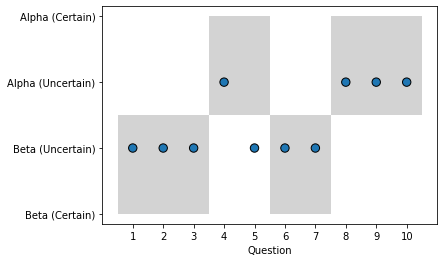

0: 
1: 
2: 
3: 
4: 
5: 
6: 
7: 
8: 
9: 

251570_ours_2 (Valid) (Accuracy)


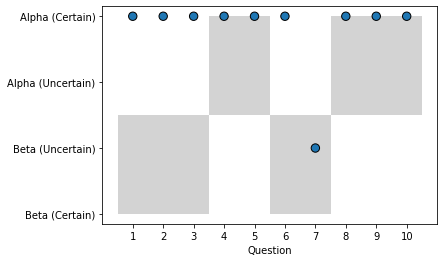

0: Beak, white/gray feathers
1: White/gray feathers
2: Beak, white gray feathers
3: white gray feathers
4: white gray feathers
5: Beak, white gray feathers
6: brownish feathers
7: white gray feathers
8: Beak, white gray feathers
9: Beak, white gray feathers
Alpha = orange tipped beak with white/gray feathers. Beta = brown feathers
251570_ours_3 (Valid) (Accuracy)


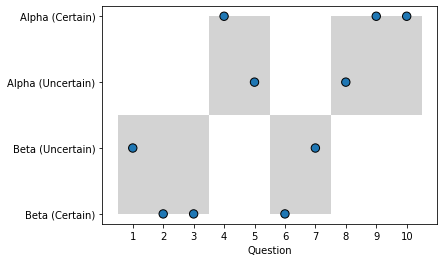

0: Wings
1: Wings
2: 
3: White color
4: 
5: 
6: 
7: 
8: 
9: 
The birds in class Alpha are all white, while the ones in class Beta have some brown feathers on their wings
251570_ours_4 (Valid) (Accuracy)


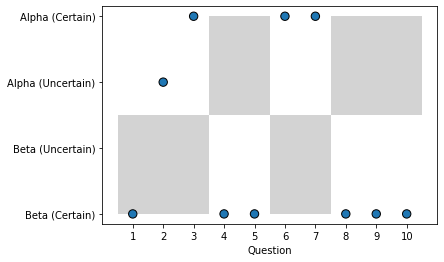

0: Dark mantle 
1: Lighter mantle, general shape
2: Bull, dark mantle and shape
3: Overall shape of bird, size and bill. Also all white 
4: All white 
5: Dark mantle and shape
6: Dark mantle 
7: Shape
8: Shape
9: Shape
I went through with the overall impression of the bird shape and color to ID them. Structurally they were quite different. 
251570_ours_5 (Valid) (Accuracy)


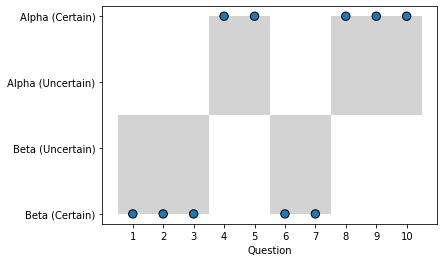

0: wings
1: wings
2: wings
3: wings
4: wings
5: wings
6: wings
7: wings
8: wings
9: wings
one bird has gray wings, one bird has white wings
251570_ours_6 (Valid) (Accuracy)


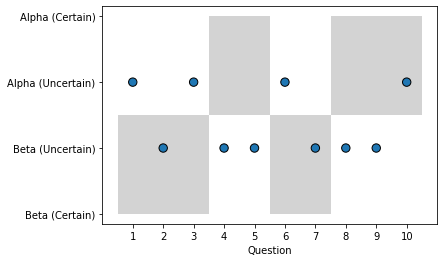

0: bicolored bill
1: white feathers
2: bicolor bill
3: single color bill
4: 
5: bicolor bill
6: 
7: 
8: 
9: bicolor bill
bill colors, feather colors
251570_ours_7 (Valid) (Accuracy)


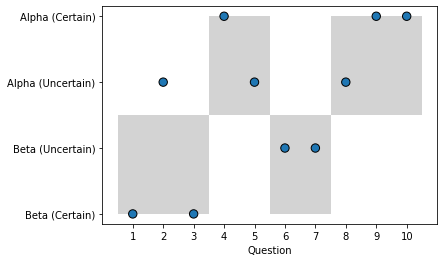

0: Color of wing feathers
1: feather color on the back
2: feather color of wings
3: feather color of wings and directly above legs
4: feather color of wings and directly above legs
5: feather color on wings
6: feather color of wings
7: feather color directly above legs
8: feather color
9: feather color

251570_ours_8 (Valid) (Accuracy)


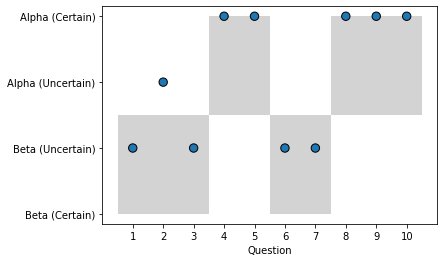

0: Wings
1: Wings
2: Wings
3: Wings
4: Wings
5: Wings
6: Wings
7: Wings
8: Wings
9: Wings
White winged birds are alpha, colored winged birds beta
Number of valid responses: 5 out of 7
251570_vandenhende (Accuracy)


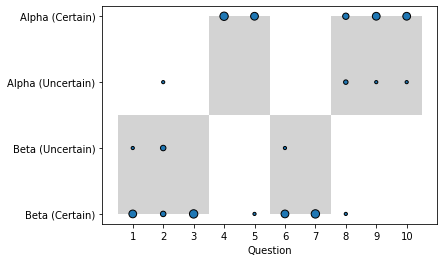

251570_vandenhende (Valid Intro) (Accuracy)


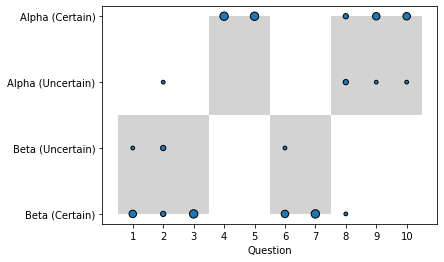

251570_vandenhende_0 (Valid) (Accuracy)


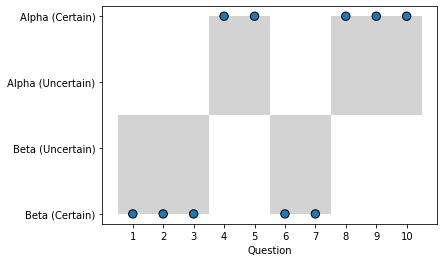

0: Color of the feathers of the wings
1: Color of the feathers of the wings
2: Color of the feathers of the wings
3: Color of the feathers of the wings
4: Color of the feathers of the wings
5: Color of the feathers of the wings
6: Color of the feathers of the wings
7: Color of the feathers of the wings
8: Color of the feathers of the wings
9: Color of the feathers of the wings
I used the color of the feathers of the wings of the bird: brown means beta. More white-ish means alpha
251570_vandenhende_1 (Valid) (Accuracy)


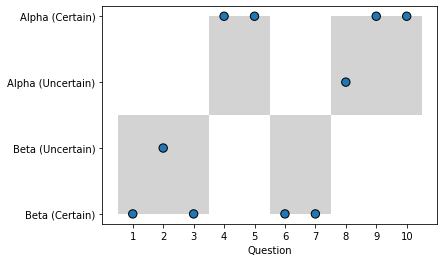

0: Wing color
1: Wing color
2: Wing color
3: Wing color
4: Wing color
5: Wing color
6: Wing color
7: Wing color
8: Wing color
9: Wing color

251570_vandenhende_2 (Valid) (Accuracy)


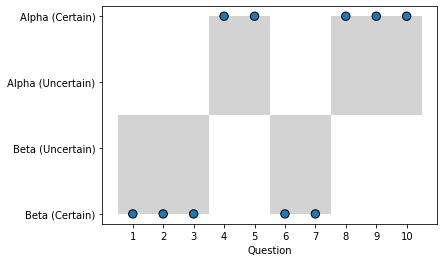

0: Grey wings; comparatively large blue-and-yellow tubenose bill
1: bill, shape of wings (silhouette), distribution of grey on back and tail
2: bill shape, grey mantle on white bird
3: silhouette, white colour over whole bird, head profile / bill shape
4: silhouette (body, head, and bill shape) white colour over most of bird, distribution of black spots
5: shape of bill, mantle, brow ("expression")
6: colour of wings, posture / bulkiness
7: silhouette, white colour, black legs
8: shape / silhouette (especially bill shape), white colour
9: silhouette, white colour, bill colour
General shape is the #1 important factor that begins all bird ID at any skill level past beginner. I am familiar with both species, but if I weren't, it is obvious that Alpha is a species of gull, from which you can focus on the common traits that differentiate gull species from one another - mantle colour, leg colour, eye colour, proportions and markings of the bill. There is only one gull that is pure white, the

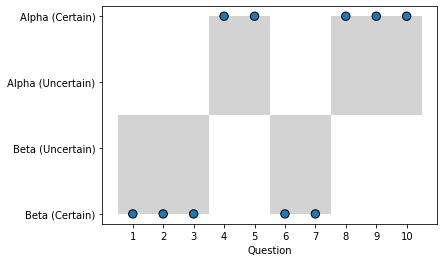

0: slate wings, deep-set eyes, "tubenose" bill
1: stocky neck, mottled gray wings (immature Ivory Gull has more finely streaked), cigar-shaped instead of streamlined body
2: tubenose bill, stocky neck, deep-set eyes
3: bill, "shallow" and beady eye, completely white wing
4: bill, shallow/beady eye, fine spots on wing, "normal-looking" legs (note: this is a complete giveaway between gulls and procellariiformes when visible)
5: slate-gray wings, deep-set eyes, awkwardly short legs noticeable even at roost
6: slate-gray wings
7: "normal-sized" legs, white plumage with dark streaks
8: "normal" legs, completely white plumage, thin bill
9: same as above
The knowledge that there were exactly two options (no more) really helped. In most pictures, plumage alone would get you quite far because Northern Fulmar / Ivory Gull are quite different. It would then go to structure: order Procellariiformes is a primarily seafaring one with very limited land abilities (shown in their wing and leg structure

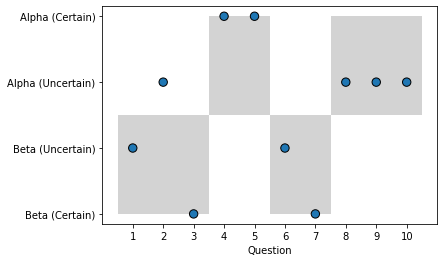

0: 
1: 
2: 
3: 
4: 
5: 
6: 
7: 
8: 
9: 

251570_vandenhende_5 (Valid) (Accuracy)


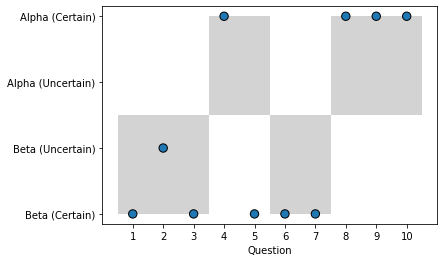

0: Beak
1: Beak and wings
2: Beak and wings
3: Beak and wings
4: Beak and wings
5: Wings
6: Wings
7: Beak and wings
8: Beak and wings
9: Wings
Alpha = Whiter wings and darker beak. Beta = Oranger beak with grey wings
251570_vandenhende_6 (Valid) (Accuracy)


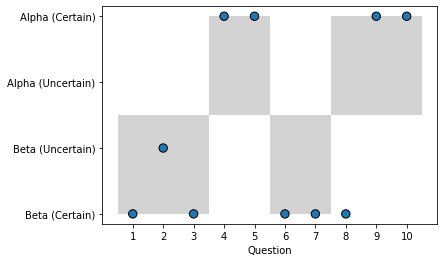

0: Grey feathers
1: 
2: 
3: 
4: Schnabel
5: 
6: 
7: 
8: 
9: 

Number of valid responses: 4 out of 6
433137_ours (Accuracy)


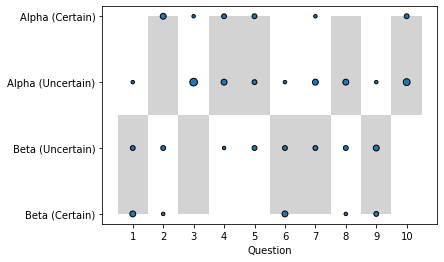

433137_ours (Valid Intro) (Accuracy)


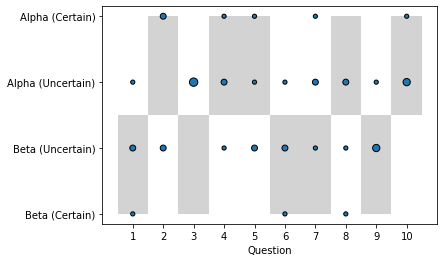

433137_ours_0 (Valid) (Accuracy)


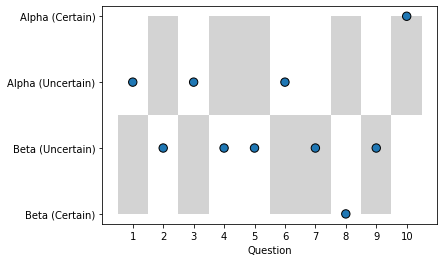

0: Eye
1: Feathers
2: Eye
3: Feather
4: Beak
5: Eye
6: Feathers
7: Feather
8: Feather
9: Feather

433137_ours_1 (Valid) (Accuracy)


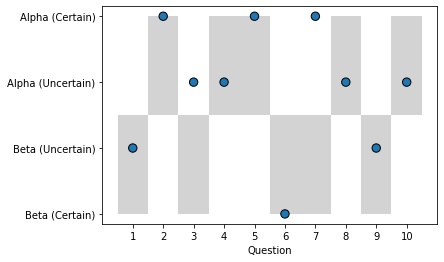

0: Eye
1: feathers
2: feathers
3: feathers
4: feathers
5: feathers
6: feathers
7: side feathers
8: feathers
9: feathers

433137_ours_2 (Valid) (Accuracy)


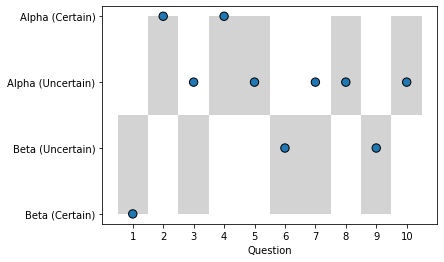

0: The large darker spot directly under & to the right of its visible eye
1: The stripier, noisier pattern of its feathers
2: 
3: The stripier, noisier feather pattern
4: The stripier, noisier feather pattern
5: 
6: 
7: 
8: The smoother, larger-scaled pattern on its feathers
9: 
It seemed like the highlighted regions on the Alpha birds indicated that they tended to have lots of thin stripes in the important areas. The Beta birds seemed to have smoother patterns that were made up of larger regions of the bird's body. I think maybe the Beta birds had stubbier beaks but I'm uncertain? It seemed like having two especially distinct colors making those large patterns around a bird's eyes was of particular importance in determining that a bird was of species Beta.
433137_ours_3 (Valid) (Accuracy)


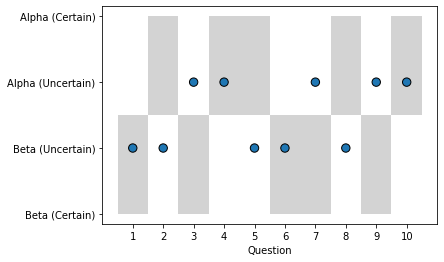

0: eye
1: colour
2: stripes
3: stripes
4: colour
5: colour
6: stripes and colour
7: colour
8: eye
9: colour and pattern
Determined common characteristics. Orange and stripey(colour pattern, feather appearance, and eye masks all counted as "stripey")
433137_ours_4 (Valid) (Accuracy)


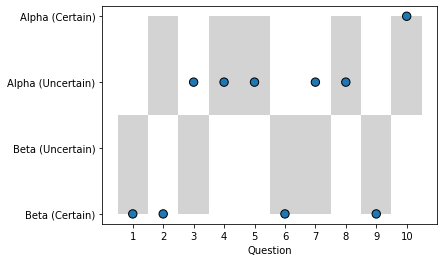

0: Missing Stripes
1: The beak looks wrong
2: 
3: 
4: 
5: The stripes are wrong / missing
6: 
7: 
8: Stripes missing, The bird looks off somehow
9: 
Mainly the stripes (if they were present and looked natural), the style of the beak
433137_ours_5 (Valid) (Accuracy)


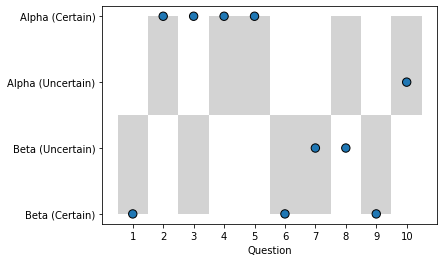

0: location of dark eye patch
1: striped feathers
2: striped feathers on top of the head
3: 
4: 
5: 
6: 
7: 
8: the transition of light feathers to plain dark feathers from head to body
9: 

Number of valid responses: 4 out of 6
433137_vandenhende (Accuracy)


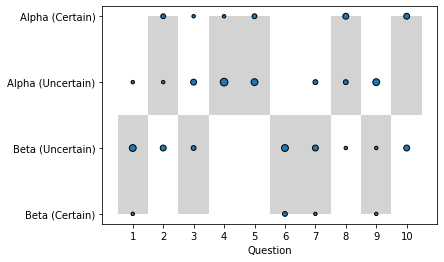

433137_vandenhende (Valid Intro) (Accuracy)


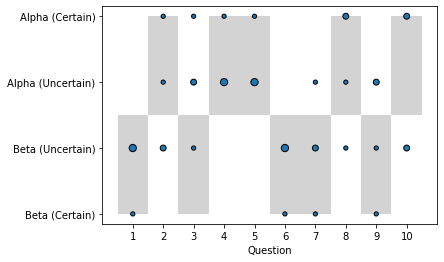

433137_vandenhende_0 (Valid) (Accuracy)


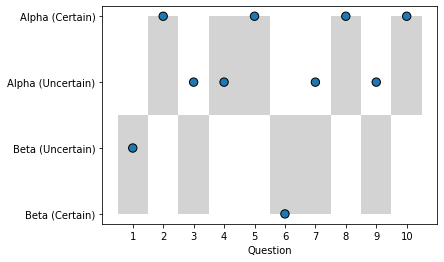

0: 
1: 
2: 
3: 
4: 
5: 
6: 
7: 
8: 
9: patterns around the eye and head
alpha: white stripes on the head, clear black/orange pattern on the back, grey area under the eye and a black stripe behind the eye, lighter throat. beta: darker area under the eye, darker beak, darker throat
433137_vandenhende_1 (Valid) (Accuracy)


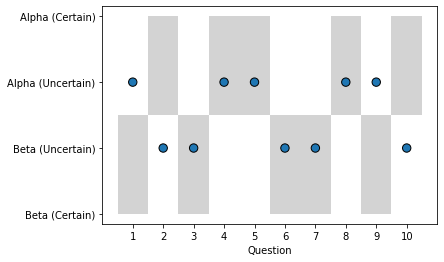

0: 
1: 
2: 
3: 
4: 
5: 
6: 
7: 
8: 
9: 

433137_vandenhende_2 (Valid) (Accuracy)


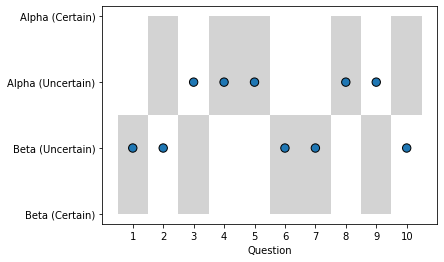

0: Head
1: Head
2: Head
3: Color
4: Head
5: Head
6: Head
7: Head
8: Head
9: Head
Colors arround the eyes and head
433137_vandenhende_3 (Valid) (Accuracy)


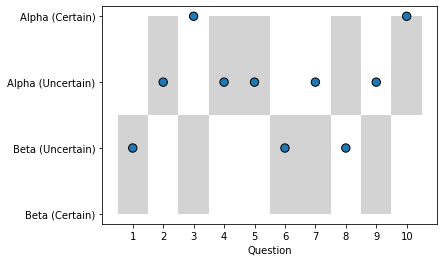

0: color
1: eyes
2: color around eyes
3: color
4: color around eyes
5: color around eyes
6: color around eyes
7: color around eyes
8: color around eyes
9: color around eyes
color of the birds, especially around the eyes
433137_vandenhende_4 (Valid) (Accuracy)


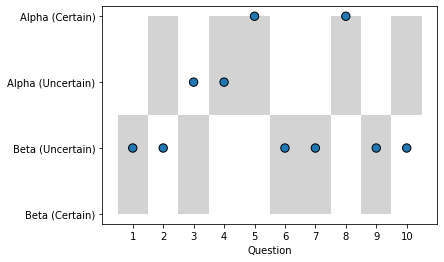

0: Beak
1: Colour around eye, head stripe
2: Area around eye, beak
3: Beak
4: Line at eye
5: Eye area
6: Eye area
7: Eye line
8: Eye area
9: Eye area, stripe on head

433137_vandenhende_5 (Valid) (Accuracy)


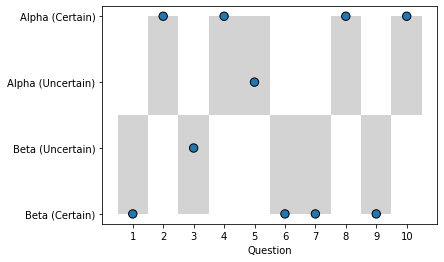

0: darker overall gray coloration
1: paler overall coloration but with crisp distinct black streaking
2: darker gray bill, apparent unstreaked nape?
3: paler overall, crisp black streaking
4: white crown stripe, crisp black flank streaking. dark chunky gray bill is confusing though
5: darker gray, blurrier streaking
6: darker gray, blurrier streaking, unstreaked nape
7: overall paler, white crown stripe, crisp black streaking by shoulders
8: less distinct rufous streaking, darker aruicular
9: streaked nape, whitish crown stripe
Pretty sure this is Nelson's vs LeConte's, both birds I don't have in my area and am not super familiar with (Ammospiza in general can be tough) but crown, auricular, nape and streaking were all pretty consistent and hopefully reliable. Is that a mental model? Not sure what this question is asking, exactly.


In [10]:
for s in studies:
    visualize_main_results(s, show_individual=True)